In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings as w
w.filterwarnings('ignore')

In [29]:
score_data = pd.read_csv("Cricket.csv")
score_data

,Player,Runs,Wkts
0,A Kumble,28655,953
1,R Ashwin,18789,727
2,Harbhajan Singh,23042,707
3,N Kapil Dev,19812,687
4,Z Khan,18797,597
...,...,...,...
95,M Nissar,707,25
96,K Srikkanth,755,25
97,Umran Malik,642,24
98,STR Binny,751,24


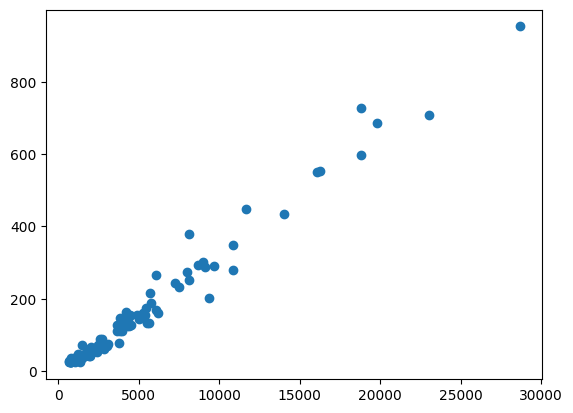

In [30]:
plt.scatter(score_data['Runs'],score_data['Wkts'])

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
predicted_op = km.fit_predict(score_data[['Runs','Wkts']])
predicted_op

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
print(km.inertia_)

357487614.12092066


In [33]:
sse=[]
krange = range(1,6)
for i in krange:
    km1=KMeans(n_clusters=i)
    km1.fit(score_data[['Runs','Wkts']])
    sse.append(km1.inertia_)
sse    

[2685364107.5999994,
 835667357.4554336,
 357487614.12092066,
 260178317.24592078,
 123721344.37270936]

<Axes: >

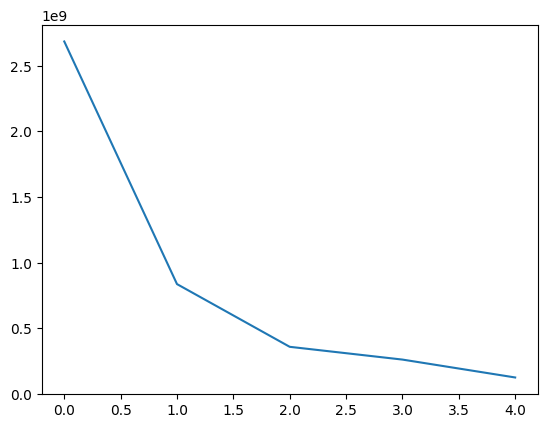

In [34]:
sns.lineplot(sse)

In [35]:
score_data['clusters'] = predicted_op
score_data

,Player,Runs,Wkts,clusters
0,A Kumble,28655,953,0
1,R Ashwin,18789,727,0
2,Harbhajan Singh,23042,707,0
3,N Kapil Dev,19812,687,0
4,Z Khan,18797,597,0
...,...,...,...,...
95,M Nissar,707,25,1
96,K Srikkanth,755,25,1
97,Umran Malik,642,24,1
98,STR Binny,751,24,1


In [36]:
status = ['Batsmen', 'Bowler', 'Allrounder']
status

['Batsmen', 'Bowler', 'Allrounder']

In [37]:
score_data['style'] = score_data['clusters'].apply(lambda x : status[x])
score_data

,Player,Runs,Wkts,clusters,style
0,A Kumble,28655,953,0,Batsmen
1,R Ashwin,18789,727,0,Batsmen
2,Harbhajan Singh,23042,707,0,Batsmen
3,N Kapil Dev,19812,687,0,Batsmen
4,Z Khan,18797,597,0,Batsmen
...,...,...,...,...,...
95,M Nissar,707,25,1,Bowler
96,K Srikkanth,755,25,1,Bowler
97,Umran Malik,642,24,1,Bowler
98,STR Binny,751,24,1,Bowler


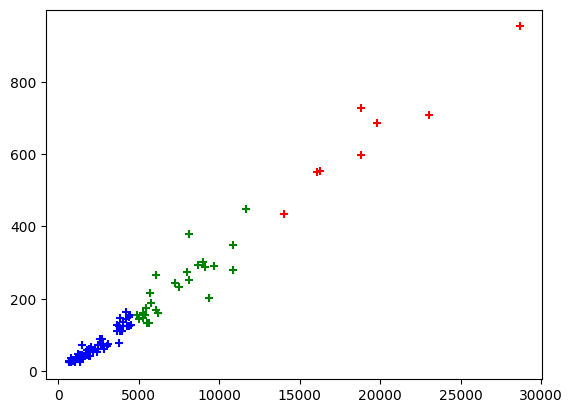

In [39]:
score_data0 = score_data[score_data['clusters']==0]
score_data1 = score_data[score_data['clusters']==1]
score_data2 = score_data[score_data['clusters']==2]
plt.scatter(score_data0['Runs'],score_data0['Wkts'],color='red',marker='+')
plt.scatter(score_data1['Runs'],score_data1['Wkts'],color='blue',marker='+')
plt.scatter(score_data2['Runs'],score_data2['Wkts'],color='green',marker='+')

In [42]:
input_ = score_data.drop(columns=['Player','Wkts','style'])
output_= score_data['style']

In [43]:
input_train, input_test, output_train, output_test=train_test_split(input_,output_,test_size=0.2)

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(input_train, output_train)
predict = knn.predict([[79,0],[35,4]])
predict

array(['Bowler', 'Bowler'], dtype=object)

In [46]:
knn.score(input_test,output_test)

1.0

<Axes: >

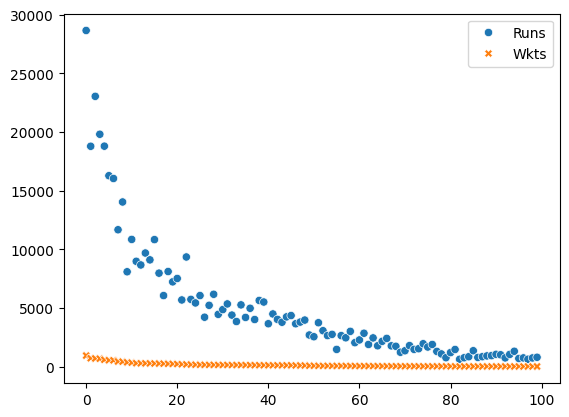

In [48]:

sns.scatterplot(score_data[['Runs',"Wkts"]])

In [49]:
print(score_data.to_string())

                Player   Runs  Wkts  clusters       style
0             A Kumble  28655   953         0     Batsmen
1             R Ashwin  18789   727         0     Batsmen
2      Harbhajan Singh  23042   707         0     Batsmen
3          N Kapil Dev  19812   687         0     Batsmen
4               Z Khan  18797   597         0     Batsmen
5            RA Jadeja  16281   553         0     Batsmen
6            J Srinath  16043   551         0     Batsmen
7       Mohammed Shami  11675   448         2  Allrounder
8             I Sharma  14041   434         0     Batsmen
9            JJ Bumrah   8094   378         2  Allrounder
10          AB Agarkar  10851   349         2  Allrounder
11           IK Pathan   8986   301         2  Allrounder
12             B Kumar   8674   294         2  Allrounder
13          BKV Prasad   9692   292         2  Allrounder
14            UT Yadav   9108   288         2  Allrounder
15          RJ Shastri  10835   280         2  Allrounder
16            